In [3]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt 
from fastdtw import fastdtw

In [5]:
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])

            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [12]:
def dtw2(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [22]:
george = [7, 5, 15, 18, 18, 7, 7, 3]
unknown = [7, 15, 15, 18, 10, 10, 10, 1, 1]

dtw(unknown, george)

array([[ 0., inf, inf, inf, inf, inf, inf, inf, inf],
       [inf,  0.,  2., 10., 21., 32., 32., 32., 36.],
       [inf,  8., 10.,  2.,  5.,  8., 16., 24., 36.],
       [inf, 16., 18.,  2.,  5.,  8., 16., 24., 36.],
       [inf, 27., 29.,  5.,  2.,  2., 13., 24., 39.],
       [inf, 30., 32., 10., 10., 10.,  5.,  8., 15.],
       [inf, 33., 35., 15., 18., 18.,  8.,  8., 15.],
       [inf, 36., 38., 20., 23., 26., 11., 11., 15.],
       [inf, 42., 40., 34., 37., 40., 17., 17., 13.],
       [inf, 48., 44., 48., 51., 54., 23., 23., 15.]])

In [21]:
dtw2(unknown, george, window=3)

array([[ 0., inf, inf, inf, inf, inf, inf, inf, inf],
       [inf,  0.,  2., 10., 21., inf, inf, inf, inf],
       [inf,  8., 10.,  2.,  5.,  8., inf, inf, inf],
       [inf, 16., 18.,  2.,  5.,  8., 16., inf, inf],
       [inf, 27., 29.,  5.,  2.,  2., 13., 24., inf],
       [inf, inf, 32., 10., 10., 10.,  5.,  8., 15.],
       [inf, inf, inf, 15., 18., 18.,  8.,  8., 15.],
       [inf, inf, inf, inf, 23., 26., 11., 11., 15.],
       [inf, inf, inf, inf, inf, 40., 17., 17., 13.],
       [inf, inf, inf, inf, inf, inf, 23., 23., 15.]])

In [310]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

distance, path = fastdtw(unknown, george, dist=euclidean)

print(distance)
print(path)

15.0
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 3), (3, 4), (4, 5), (5, 6), (6, 6), (7, 7), (8, 7)]


In [311]:
path_ = []
path = np.array(path)
i = 0
for item in path:
    if path[...,0][i] == path[...,0][-1]:
        path_.append(item)
        break
    if path[...,0][i] != path[...,0][i + 1]:
        path_.append(item)
    i = i + 1
path_ = np.array(path_)    
path_

array([[0, 1],
       [1, 2],
       [2, 2],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 6],
       [7, 7],
       [8, 7]])

In [324]:
george

[7, 5, 15, 18, 18, 7, 7, 3]

In [189]:
path_[...,1]

array([1, 2, 2, 4, 5, 6, 6, 7, 7])

In [312]:
path

array([[0, 0],
       [0, 1],
       [1, 2],
       [2, 2],
       [3, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 6],
       [7, 7],
       [8, 7]])

In [322]:
df = pd.DataFrame(george, columns = ['george'])
df = df.iloc[path[...,1]]
df.insert(0, 'unknown_ref', path[...,0])
df.insert(1, 'george_ref', path[...,1])
df

,unknown_ref,george_ref,george
0,0,0,7
1,0,1,5
2,1,2,15
2,2,2,15
3,3,3,18
4,3,4,18
5,4,5,7
6,5,6,7
6,6,6,7
7,7,7,3


In [323]:
df = df.groupby('unknown_ref').mean()
df = df.drop(columns = ['george_ref'])
df

,george
unknown_ref,
0,6
1,15
2,15
3,18
4,7
5,7
6,7
7,3
8,3


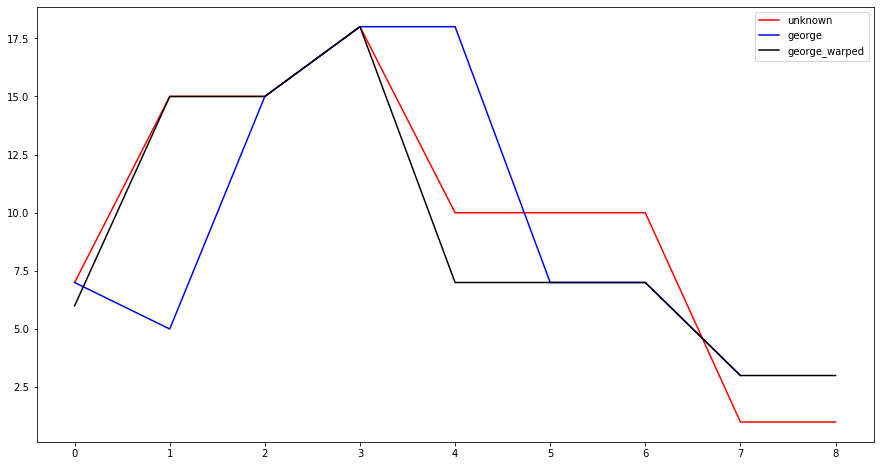

In [390]:
plt.figure(figsize=(15,8))
plt.plot(unknown, 'r', label = 'unknown')
plt.plot(george, 'b', label = 'george')
plt.plot(df['george'].values, 'k', label = 'george_warped')
plt.legend()
plt.show()

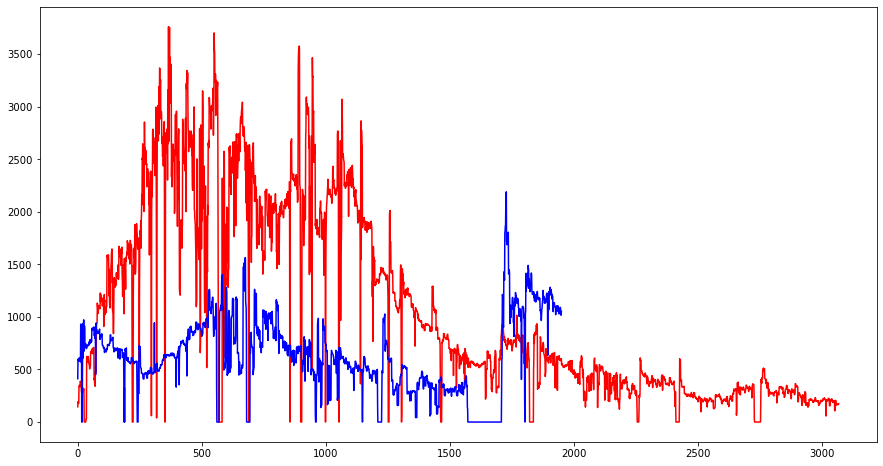

In [134]:
data = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B03-1P.csv")
# data2 = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B09-04P.csv")
data2 = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B09-03P.csv")
# data2 = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/W07-1P.csv")
# data2 = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B06-7P.csv")
# data['Prod_Date'] = pd.to_datetime(data['Date'])
# data2['Prod_Date'] = pd.to_datetime(data2['Date'])
# data = data.set_index('Prod_Date')
# data2 = data2.set_index('Prod_Date')
# data = data.drop(columns = 'Date')
# data2 = data2.drop(columns = 'Date')
data_smooth = data["Oil [bbl/d]"].rolling(30, min_periods=1).mean()


plt.figure(figsize=(15,8))
plt.plot(data['Oil [bbl/d]'].values, 'r', label = 'data1')
plt.plot(data2['Oil [bbl/d]'].values, 'b', label = 'data2')
# plt.plot(data_smooth, 'k', label = 'data2')
plt.show()

In [ ]:
    if steam_input_data.values.reshape(-1,1).shape[1] < 2:
        steam_input_names = steam_input_data.name
    elif steam_input_data.values.shape[1] == 2 or steam_input_data.values.shape[1] > 2: 
        steam_input_names = steam_input_data.columns
     
    if emulsion_input_data.values.reshape(-1,1).shape[1] < 2:
        emulsion_input_names = emulsion_input_data.name
    elif emulsion_input_data.values.shape[1] == 2 or emulsion_input_data.values.shape[1] > 2: 
        emulsion_input_names = emulsion_input_data.columns

In [135]:
x = data['Oil [bbl/d]'].values
y = data2['Oil [bbl/d]'].values
len(x)

3069

In [126]:
df = pd.read_csv("C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B03-1P.csv")
df1 = df.drop(columns = ['Date', 'WHP', 'Avg Water [m3/d]'])
data = df1['Oil [bbl/d]'] / 6.28981
df1.insert(4, 'Oil [m3/d]', data)   
time_data = np.arange(len(df1))
df1.insert(0, 'Timestep', time_data) 
df1['Cum Oil [m3]'] = df1['Oil [m3/d]'].cumsum()
data = df1['Cum Oil [m3]'] / 684608.8125
df1.insert(1, 'RF', data)
df1

,Timestep,RF,Speed [Hz],Current [A],IBHP,PBHP,Oil [m3/d],Co-Injection [E3m3/d],Oil [bbl/d],Steam [m3/d],Emulsion [m3/d],Cum Oil [m3]
0,0,0.000034,11,14.008894,2719.4,2520.8,23.053161,0.0,145.0,203.0,251.0,23.053161
1,1,0.000079,10,13.227521,2719.4,2520.8,30.843539,0.0,194.0,450.0,237.0,53.896700
2,2,0.000122,12,15.292577,2719.4,2520.8,29.730628,0.0,187.0,400.0,274.0,83.627327
3,3,0.000164,12,15.180952,2719.4,2520.8,28.458729,0.0,179.0,323.0,272.0,112.086057
4,4,0.000205,11,13.841457,2719.4,2520.8,28.140755,0.0,177.0,391.0,248.0,140.226811
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,3064,0.757906,48,12.300000,0.0,2684.2,27.345818,13.0,172.0,0.0,51.0,518868.932448
3065,3065,0.757945,48,12.300000,0.0,2680.6,27.027843,14.0,170.0,0.0,50.0,518895.960291
3066,3066,0.757984,48,12.300000,0.0,2680.6,26.391894,14.0,166.0,0.0,49.0,518922.352186
3067,3067,0.758023,48,12.300000,0.0,2679.9,26.550882,14.0,167.0,0.0,49.0,518948.903067


In [150]:
sstats_val_ROIP = df1.loc[:, 'RF']
RF = sstats_val_ROIP[0]
RF

3.367347917145992e-05

In [127]:
df1 = df1.drop(columns = ['Timestep'])
# RF_index_last =  round(df1['RF'].values[-1], 2)
RF_index_last =  df1['RF'].values[-1]
ncol = len(df1.columns)
RF_index_last

0.7580627044183942

In [128]:
RF_index = np.arange(0, RF_index_last, 0.00025)
nrow = len(RF_index)
df2  = pd.DataFrame(np.zeros([nrow, ncol-1])*np.nan, columns = list(df1.columns)[1:])
df2.insert(list(df1.columns).index('RF'), 'RF', RF_index)
df2

,RF,Speed [Hz],Current [A],IBHP,PBHP,Oil [m3/d],Co-Injection [E3m3/d],Oil [bbl/d],Steam [m3/d],Emulsion [m3/d],Cum Oil [m3]
0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3028,0.75700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3029,0.75725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,0.75750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,0.75775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df_merged = pd.concat([df1, df2], axis=0, sort=False)
df_merged = df_merged.sort_values(by=['RF'])
# df_merged = df_merged.reset_index(drop=True)


In [130]:
df_merged

,RF,Speed [Hz],Current [A],IBHP,PBHP,Oil [m3/d],Co-Injection [E3m3/d],Oil [bbl/d],Steam [m3/d],Emulsion [m3/d],Cum Oil [m3]
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.000034,11.0,14.008894,2719.4,2520.8,23.053161,0.0,145.0,203.0,251.0,23.053161
1,0.000079,10.0,13.227521,2719.4,2520.8,30.843539,0.0,194.0,450.0,237.0,53.896700
2,0.000122,12.0,15.292577,2719.4,2520.8,29.730628,0.0,187.0,400.0,274.0,83.627327
3,0.000164,12.0,15.180952,2719.4,2520.8,28.458729,0.0,179.0,323.0,272.0,112.086057
...,...,...,...,...,...,...,...,...,...,...,...
3065,0.757945,48.0,12.300000,0.0,2680.6,27.027843,14.0,170.0,0.0,50.0,518895.960291
3066,0.757984,48.0,12.300000,0.0,2680.6,26.391894,14.0,166.0,0.0,49.0,518922.352186
3032,0.758000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3067,0.758023,48.0,12.300000,0.0,2679.9,26.550882,14.0,167.0,0.0,49.0,518948.903067


In [131]:
df_merged.interpolate(method='polynomial', order=2)

,RF,Speed [Hz],Current [A],IBHP,PBHP,Oil [m3/d],Co-Injection [E3m3/d],Oil [bbl/d],Steam [m3/d],Emulsion [m3/d],Cum Oil [m3]
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.000034,11.0,14.008894,2.719400e+03,2520.8,23.053161,0.0,145.0,2.030000e+02,251.0,23.053161
1,0.000079,10.0,13.227521,2.719400e+03,2520.8,30.843539,0.0,194.0,4.500000e+02,237.0,53.896700
2,0.000122,12.0,15.292577,2.719400e+03,2520.8,29.730628,0.0,187.0,4.000000e+02,274.0,83.627327
3,0.000164,12.0,15.180952,2.719400e+03,2520.8,28.458729,0.0,179.0,3.230000e+02,272.0,112.086057
...,...,...,...,...,...,...,...,...,...,...,...
3065,0.757945,48.0,12.300000,0.000000e+00,2680.6,27.027843,14.0,170.0,0.000000e+00,50.0,518895.960291
3066,0.757984,48.0,12.300000,0.000000e+00,2680.6,26.391894,14.0,166.0,0.000000e+00,49.0,518922.352186
3032,0.758000,49.0,12.200000,4.290667e-246,2663.3,24.484046,13.0,154.0,4.290667e-247,44.0,517929.953369
3067,0.758023,48.0,12.300000,0.000000e+00,2679.9,26.550882,14.0,167.0,0.000000e+00,49.0,518948.903067


In [136]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

distance, path = fastdtw(x, y, dist=euclidean)

# print(distance)
# print(path)
# print(np.array(path))
# print(np.array(path).shape)

In [158]:
k = [np.array([1,5,2.3,9]), np.array([1,5,2.3,9])]
k

[array([1. , 5. , 2.3, 9. ]), array([1. , 5. , 2.3, 9. ])]

In [76]:
np.array(list(data2.columns))[k]

array(['IBHP', 'Speed [Hz]', 'Current [A]', 'Date'], dtype='<U21')

In [71]:
print((2,4))

(2, 4)


In [138]:
path = np.array(path)
time_warp_index_ = path[...,1]
index_ref_well = path[...,0]
data_ = data2.iloc[time_warp_index_]
data_.insert(0, 'index_ref', index_ref_well)
data_ = data_.groupby('index_ref').mean()
# data_['Oil [bbl/d]']
# data_3

In [302]:
path_ = []
path = np.array(path)
i = 0
for item in path:
    if path[...,0][i] == path[...,0][-1]:
        path_.append(item)
        break
    if path[...,0][i] != path[...,0][i + 1]:
        path_.append(item)
    i = i + 1
path_ = np.array(path_)  
# path_
# warp_index = path_[...,1]

In [385]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [420]:
pd.reset_option("display.max_rows")

In [139]:
dat = data2.loc[time_warp_index_, ['Oil [bbl/d]']]
dat.insert(0, 'index_ref', index_ref_well)
dat

,index_ref,Oil [bbl/d]
0,0,412.0
0,1,412.0
0,2,412.0
0,3,412.0
0,4,412.0
...,...,...
1946,3064,1089.0
1947,3065,1076.0
1948,3066,1020.0
1949,3067,1016.0


In [140]:
data33 = dat.groupby('index_ref').mean()
data33.insert(0, 'Oil [bbl/d]_ref', x)
data33

,Oil [bbl/d]_ref,Oil [bbl/d]
index_ref,,
0,145.0,412.0
1,194.0,412.0
2,187.0,412.0
3,179.0,412.0
4,177.0,412.0
...,...,...
3064,172.0,1089.0
3065,170.0,1076.0
3066,166.0,1020.0


In [141]:
data2['Oil [bbl/d]'].head(300)

0      412.0
1      593.0
2      588.0
3      604.0
4      579.0
       ...  
295    512.0
296    514.0
297    514.0
298    512.0
299    464.0
Name: Oil [bbl/d], Length: 300, dtype: float64

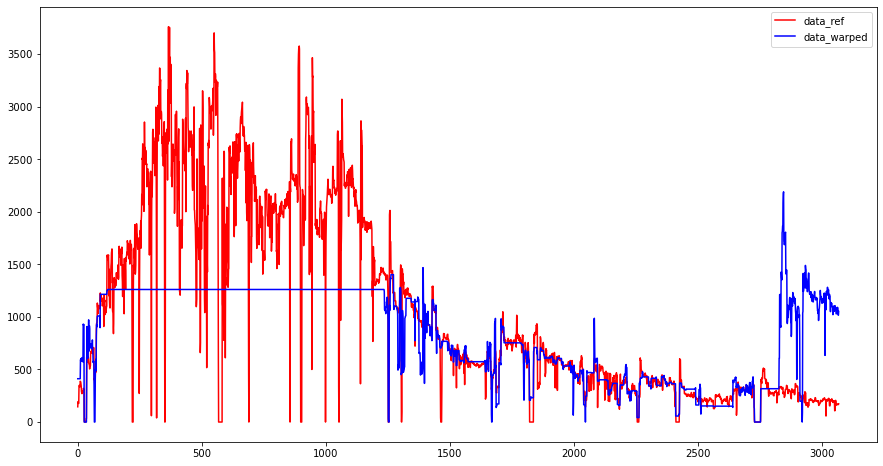

In [142]:
plt.figure(figsize=(15,8))
plt.plot(data33['Oil [bbl/d]_ref'].values, 'r', label = 'data_ref')
# plt.plot(data2['Oil [bbl/d]'].values, 'k', label = 'data_2')
plt.plot(data33['Oil [bbl/d]'].values, 'b', label = 'data_warped')
plt.legend()
plt.show()

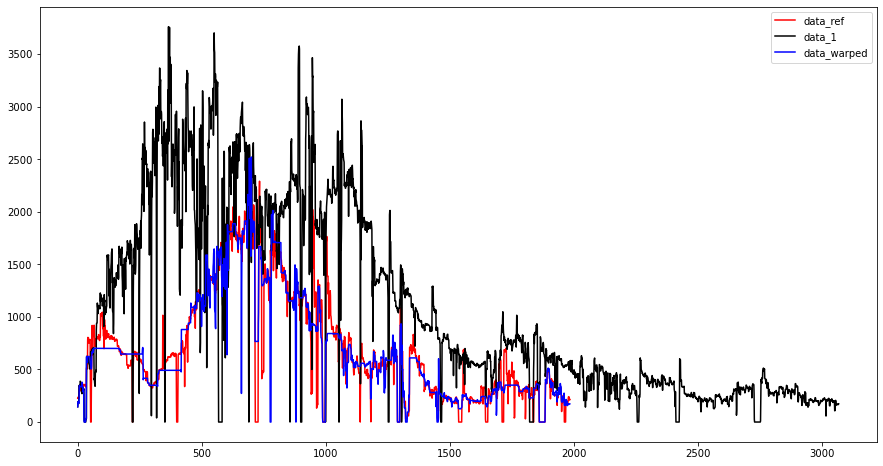

In [334]:
plt.figure(figsize=(15,8))
plt.plot(data33['Oil [bbl/d]_ref'].values, 'r', label = 'data_ref')
plt.plot(data['Oil [bbl/d]'].values, 'k', label = 'data_1')
plt.plot(data33['Oil [bbl/d]'].values, 'b', label = 'data_warped')
plt.legend()
plt.show()